## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# observe uniquesness of all features
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [5]:
# check for null values in the features
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Normal share: {}\nFraud share: {}".format(round(normal_share, 3), round(fraud_share, 3)))

Normal share: 99.827
Fraud share: 0.173


In [7]:
y_counts = list(df.Class.value_counts().values)
y_percents = np.round(df.Class.value_counts(normalize=True).values, 4)
print("y_counts: {}\ny_percents: {}".format(y_counts, y_percents))

y_counts: [284315, 492]
y_percents: [0.9983 0.0017]


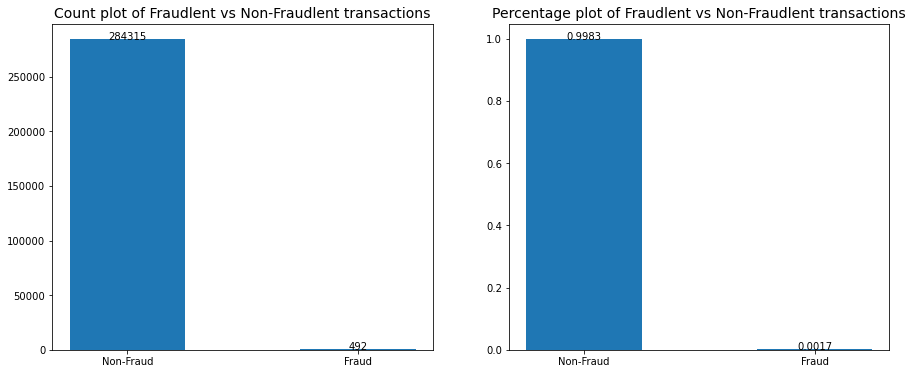

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=[15, 6])

# count plot
plt.subplot(1,2,1)
plt.bar(df.Class.value_counts().index, df.Class.value_counts().values, width=0.5)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
for i in range(len(y_counts)):
  plt.text(i, y_counts[i], y_counts[i], ha='center')
plt.title('Count plot of Fraudlent vs Non-Fraudlent transactions', fontsize=14)

# percentage plot
plt.subplot(1,2,2)
plt.bar(df.Class.value_counts().index, df.Class.value_counts(normalize=True).values, width=0.5)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
for i in range(len(y_percents)):
  plt.text(i, y_percents[i], y_percents[i], ha='center')
plt.title('Percentage plot of Fraudlent vs Non-Fraudlent transactions', fontsize=14)

plt.show()

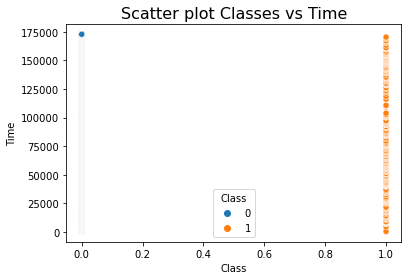

In [18]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df.Class, df.Time, hue=df.Class)
plt.title('Scatter plot Classes vs Time', fontsize=16)
plt.show()

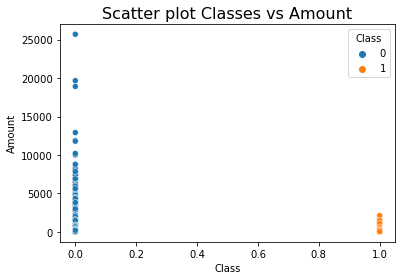

In [19]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df.Class, df.Amount, hue=df.Class)
plt.title('Scatter plot Classes vs Amount', fontsize=16)
plt.show()

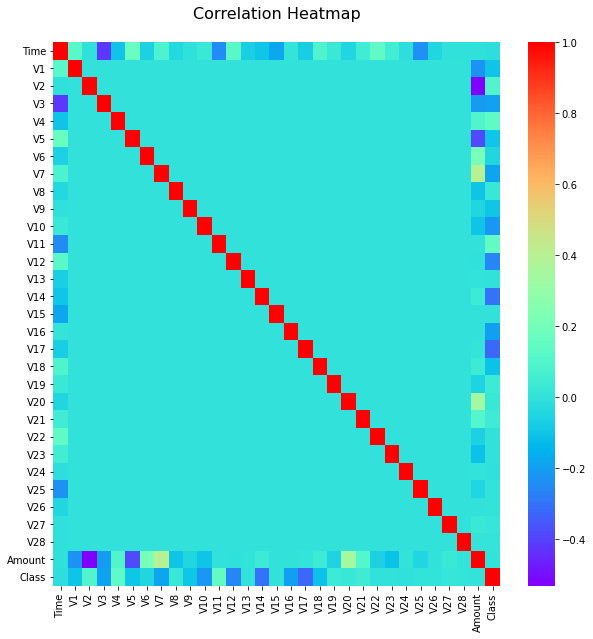

In [20]:
#plotting the correlation matrix
plt.figure(figsize = [10,10])
sns.heatmap(df.corr(),cmap='rainbow')
plt.title('Correlation Heatmap\n', fontsize=16)
plt.show()

In [21]:
# Drop unnecessary columns
df = df.drop('Time', axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [22]:
X = df.drop('Class', axis=1)
y= df.Class

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (199364, 29)
y_train: (199364,)
X_test: (85443, 29)
y_test: (85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [24]:
print("Fraud count in Full Data:",np.sum(y))
print("Fraud count in Train Data:",np.sum(y_train))
print("Fraud count in Test Data:",np.sum(y_test))

Fraud count in Full Data: 492
Fraud count in Train Data: 344
Fraud count in Test Data: 148


As all other columns are PCA performed, and Amount column is not. So lets standardize Amount column. 

In [27]:
# standardize 'Amount' column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = ['Amount']

X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

### Plotting the distribution of a variable

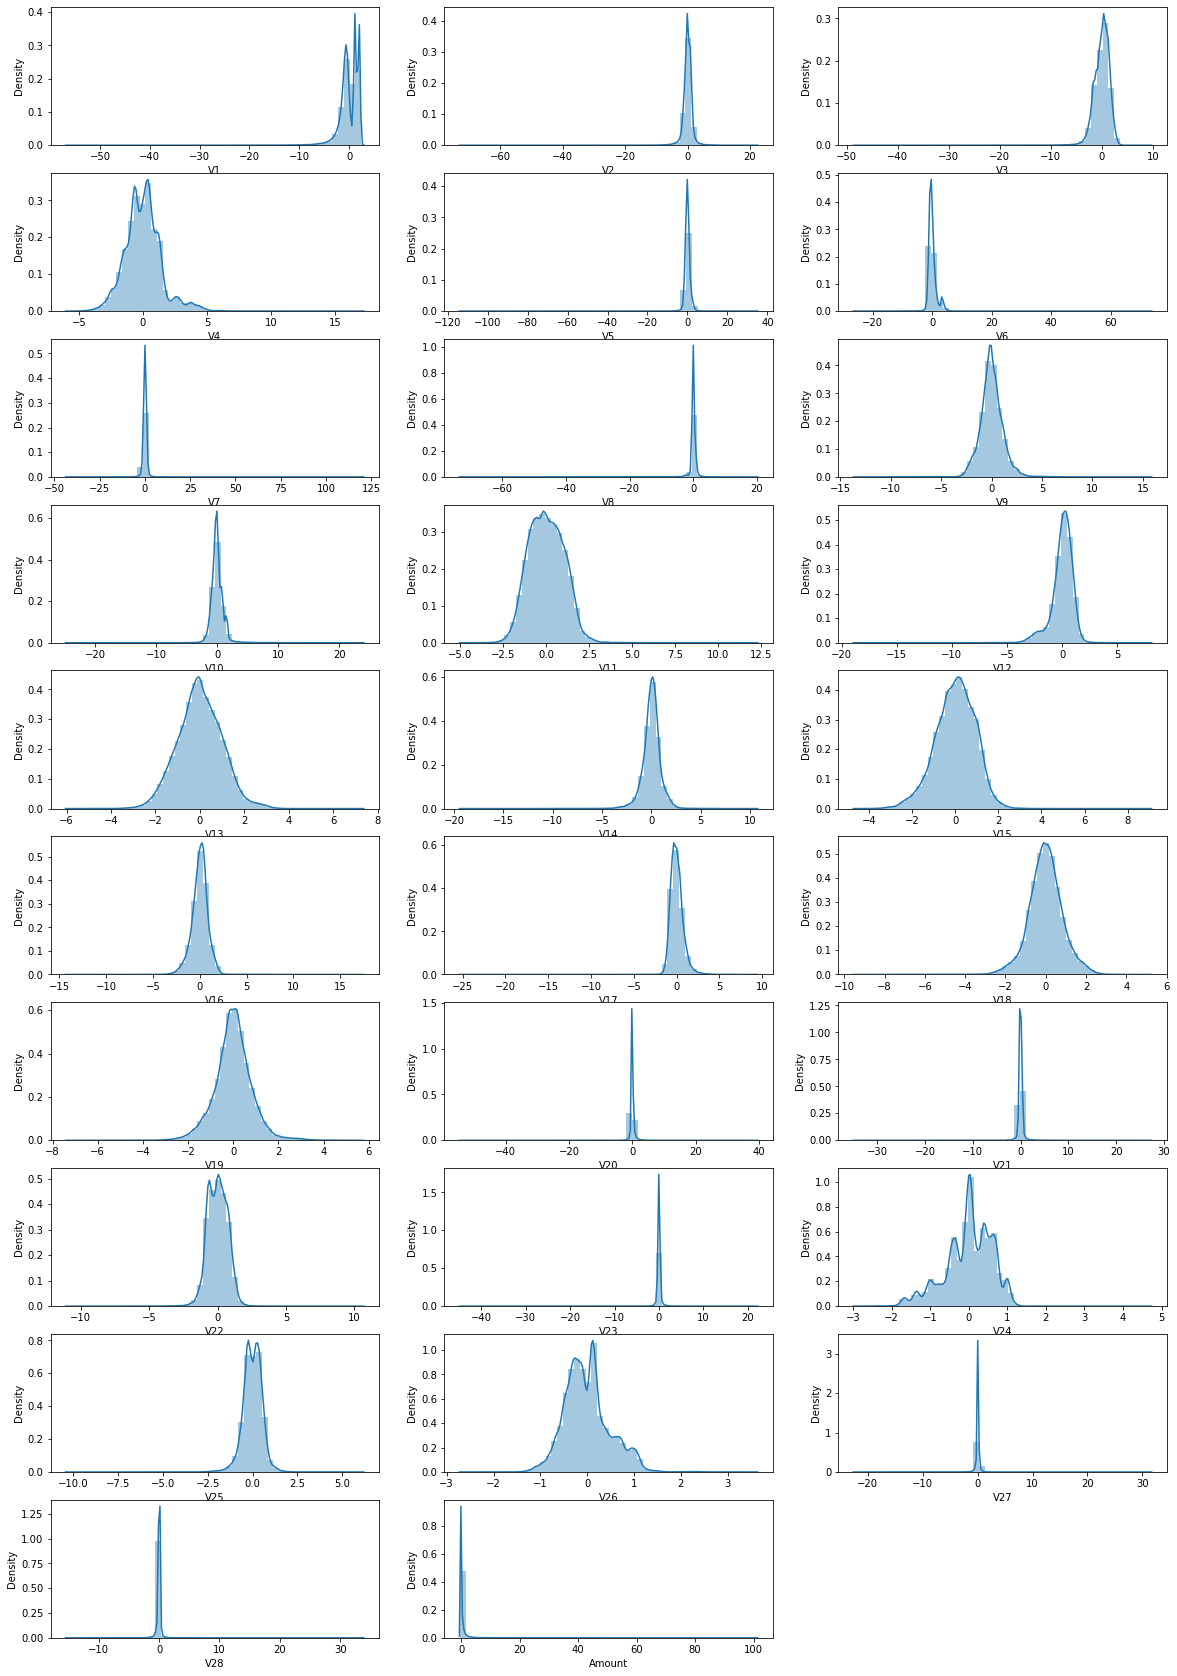

In [28]:
# plot the histogram of a variable from the dataset to see the skewness
all_train_cols = X_train.columns

plt.figure(figsize=[20, 30])
for i in range(len(all_train_cols)):
  plt.subplot(10, 3, i+1)
  sns.distplot(X_train[all_train_cols[i]])

plt.show()

Looks like many features are highly skewed. So lets check for skewness, whether out of range of -1 to 1. It can be checked using key word called `skew()`. 

In [38]:
# lets check skewness of all features
skew_values = []
all_cols = X_train.columns

for col in all_cols:
    skew_values.append(X_train[col].skew())


# skewnewss dataframe
skew_df = pd.DataFrame({'Features': all_cols,
                       'Skewness': skew_values})
skew_df.set_index('Features', inplace=True)
skew_df

,Skewness
Features,
V1,-3.350182
V2,-4.834316
V3,-2.322368
V4,0.698531
V5,-3.127732
V6,2.025515
V7,3.646023
V8,-8.851522
V9,0.546540


In [39]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = skew_df.loc[(skew_df["Skewness"] > 1) | (skew_df["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [41]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pow_trans = PowerTransformer()

# Fitting the power transformer in train data
X_train[skewed] = pow_trans.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pow_trans.transform(X_test[skewed])

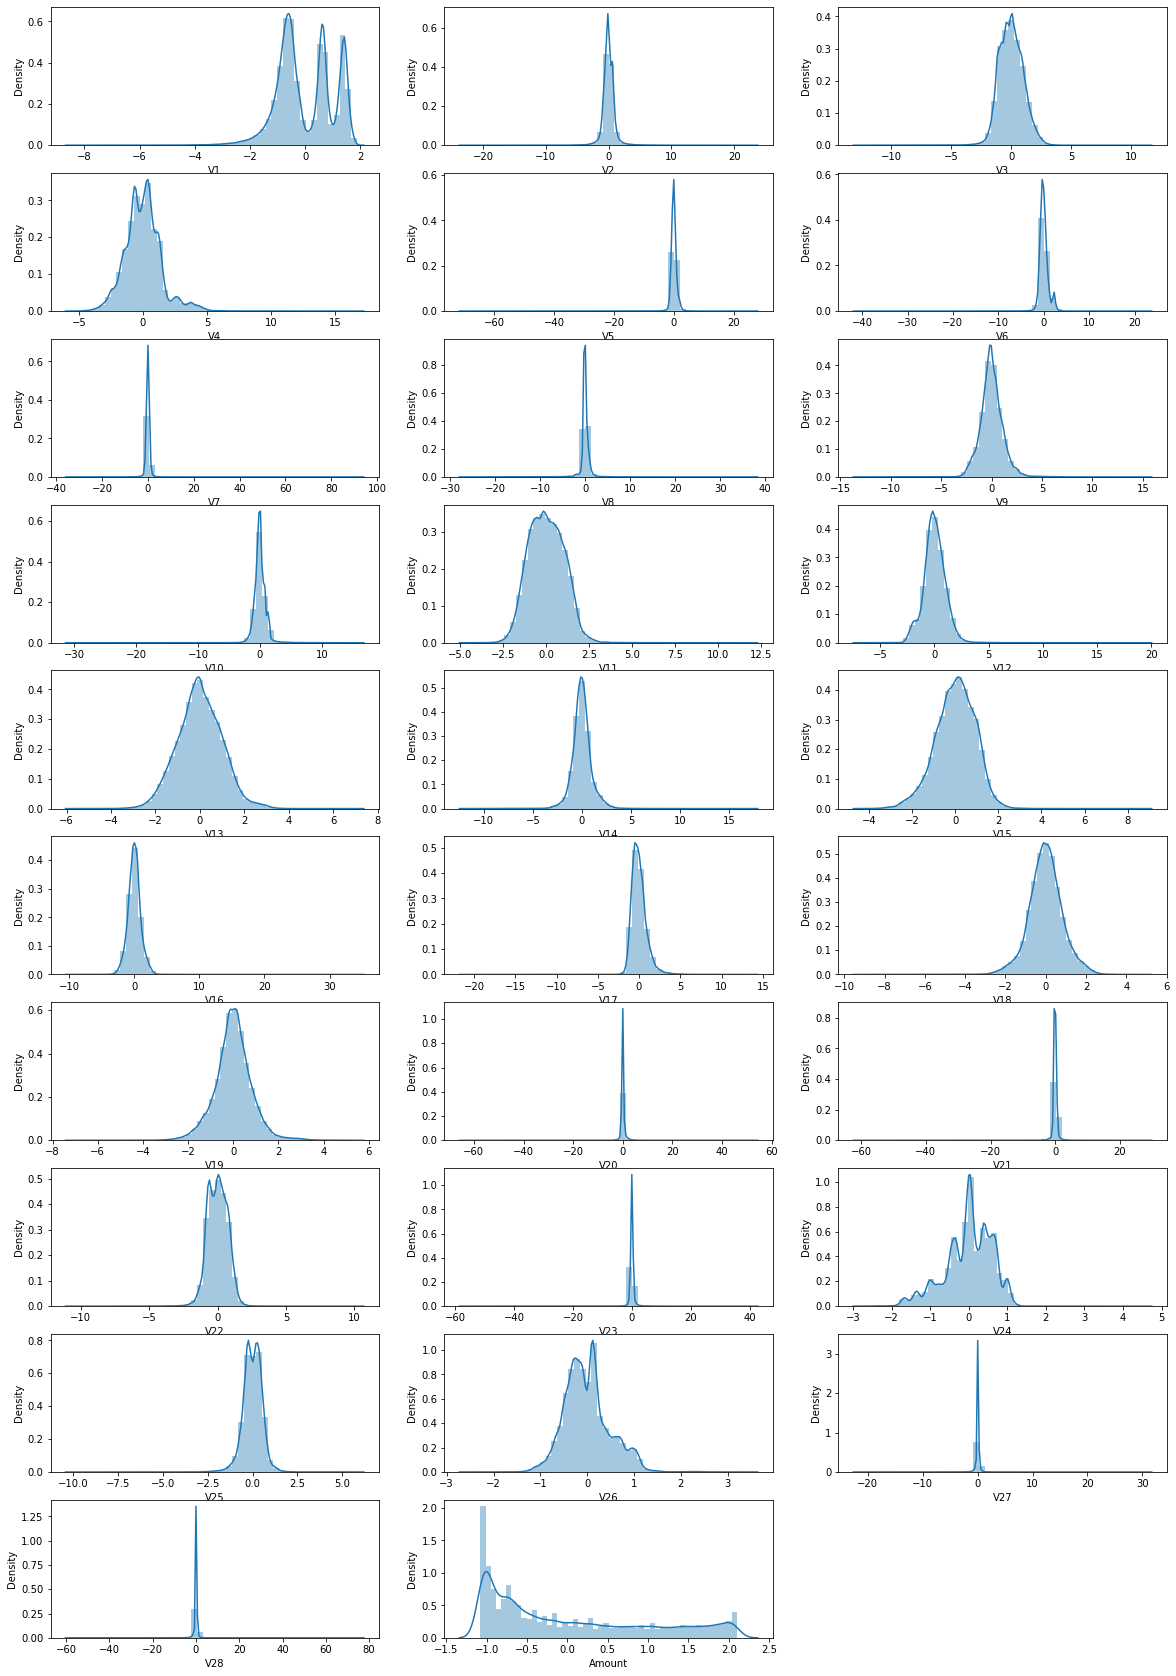

In [42]:
# plot the histogram of a variable from the dataset again to see the result 
all_train_cols = X_train.columns

plt.figure(figsize=[20, 30])
for i in range(len(all_train_cols)):
  plt.subplot(10, 3, i+1)
  sns.distplot(X_train[all_train_cols[i]])

plt.show()

## 1. Model Building
**Build different models on the imbalanced dataset and see the result**

We are going to build the following Models mentioned below and at last we'll compare the best model. We are not going to user KNN and SVM as these algorithms are computationaly expensive and need more computational resources as our Dataset is large.

- LogisticRegression
- Decision Tree Classifier
- RandomForest Classifier
- XGBoost Classifier

### Logistic Regression

In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=42)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'class_weight': ["balanced", {0:0.3, 1:0.7}, {0:0.2, 1:0.8}]
}

# grid search
grid_model_log_reg = GridSearchCV(estimator=log_reg, param_grid=params, cv=5, 
                                  n_jobs=-1, verbose=2, scoring='roc_auc', return_train_score=True)

In [76]:
# fit grid model
grid_model_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [77]:
# cross validation results
cv_results = pd.DataFrame(grid_model_log_reg.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.539777,0.018475,0.021293,0.000548,0.001,{'C': 0.001},0.982298,0.969266,0.992424,0.990877,...,0.985265,0.008785,1,0.986425,0.991180,0.984648,0.985812,0.986534,0.986920,0.002233
1,0.829471,0.029251,0.021489,0.000890,0.01,{'C': 0.01},0.981358,0.968519,0.993928,0.993195,...,0.985051,0.009406,2,0.987287,0.992612,0.983964,0.985912,0.987160,0.987387,0.002872
2,1.247050,0.129134,0.021546,0.000533,0.1,{'C': 0.1},0.975953,0.964618,0.993942,0.992828,...,0.981445,0.010968,3,0.985433,0.990752,0.979697,0.983187,0.985748,0.984963,0.003612
3,1.494671,0.043180,0.021185,0.000345,1,{'C': 1},0.973996,0.963387,0.993086,0.992209,...,0.979788,0.011367,4,0.984489,0.989648,0.978017,0.982123,0.985119,0.983879,0.003812
4,1.507536,0.096514,0.020653,0.000235,10,{'C': 10},0.973741,0.963242,0.992908,0.992119,...,0.979540,0.011411,5,0.984355,0.989484,0.977784,0.981981,0.985029,0.983726,0.003837


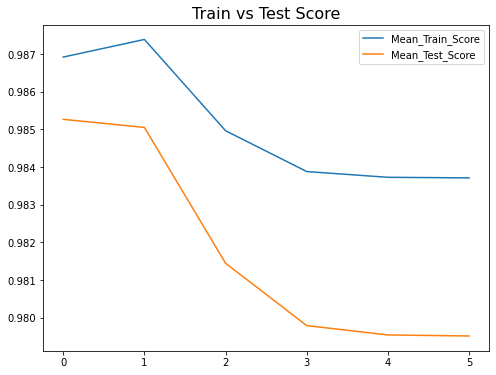

In [78]:
# plot train vs test scores
plt.figure(figsize=[8, 6])
plt.plot(cv_results.mean_train_score, label="Mean_Train_Score")
plt.plot(cv_results.mean_test_score, label="Mean_Test_Score")
plt.legend()
plt.title("Train vs Test Score", fontsize=16)
plt.show()

In [79]:
print("Best Params:", grid_model_log_reg.best_params_)
best_model_log_reg = grid_model_log_reg.best_estimator_
best_model_log_reg

Best Params: {'C': 0.001}


LogisticRegression(C=0.001, random_state=42)

#### Lets Predict and Evaluate the model

The below evaluation function can be used to evaluate all the models build in our notebook here.

In [118]:
# import libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.metrics import recall_score, precision_score, plot_roc_curve, f1_score

In [81]:
# evaluation functions

def all_classification_metrics(actual_output, predicted_output):
    print(confusion_matrix(actual_output, predicted_output))
    print(classification_report(actual_output, predicted_output))
    print("Accuracy:",round(accuracy_score(actual_output, predicted_output), 3))
    print("Recall:", round(recall_score(actual_output, predicted_output), 3))
    print("Precision:", round(precision_score(actual_output, predicted_output), 3))


def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    # print train data metric scores
    print("TRAIN data Details: ")
    all_classification_metrics(y_train, y_train_pred)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_train, y_train)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()
    
    print("="*50,"\n")
    # print test data metric scores
    print("TEST data Details: ")
    all_classification_metrics(y_test, y_test_pred)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

TRAIN data Details: 
[[198995     25]
 [   161    183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.88      0.53      0.66       344

    accuracy                           1.00    199364
   macro avg       0.94      0.77      0.83    199364
weighted avg       1.00      1.00      1.00    199364

Accuracy: 0.999
Recall: 0.532
Precision: 0.88


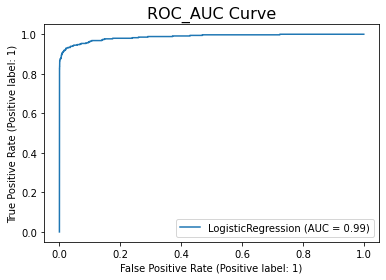


TEST data Details: 
[[85280    15]
 [   76    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.49      0.61       148

    accuracy                           1.00     85443
   macro avg       0.91      0.74      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.999
Recall: 0.486
Precision: 0.828


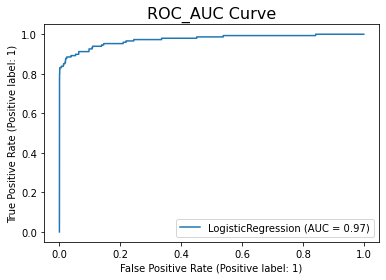

In [82]:
# evaluate logistic regression
evaluation(best_model_log_reg)

**From the above model we can see that, Recall Score is very low(i.e., 50%).**
- As we have to predict more fraudulent casses, we need to have high Recall score.

So, Lets build other model with the dataset we have.

### Decision Tree Classifier

In [83]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 20, 30, 35],
    "min_samples_split": [4, 10, 16, 20]
}

# grid search
grid_model_dt = GridSearchCV(estimator=dt, param_grid=params, cv=5,
                            n_jobs=-1, verbose=2, scoring='roc_auc', return_train_score=True)

In [85]:
# fit dt grid search
grid_model_dt.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 35],
                         'min_samples_split': [4, 10, 16, 20]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [87]:
# cross validation results
cv_results = pd.DataFrame(grid_model_dt.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.110191,0.053422,0.020412,0.000685,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.875450,0.811376,...,0.847178,0.021305,32,0.958835,0.981117,0.963985,0.960858,0.970680,0.967095,0.008078
1,10.149977,0.121189,0.019352,0.001129,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.889928,0.869266,...,0.861693,0.026947,31,0.958821,0.981102,0.963969,0.960853,0.970662,0.967081,0.008076
2,10.024521,0.075826,0.018212,0.000389,gini,10,16,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.933315,0.869244,...,0.870404,0.044213,29,0.958808,0.981093,0.963966,0.960848,0.970655,0.967074,0.008076
3,9.894838,0.106191,0.017902,0.000846,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.918850,0.869184,...,0.870381,0.040748,30,0.958792,0.981078,0.963963,0.960836,0.970617,0.967057,0.008073
4,15.395960,1.404316,0.018843,0.000317,gini,20,4,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.904757,0.854807,...,0.885479,0.018066,23,0.999966,1.000000,0.999951,0.998426,0.998964,0.999461,0.000649


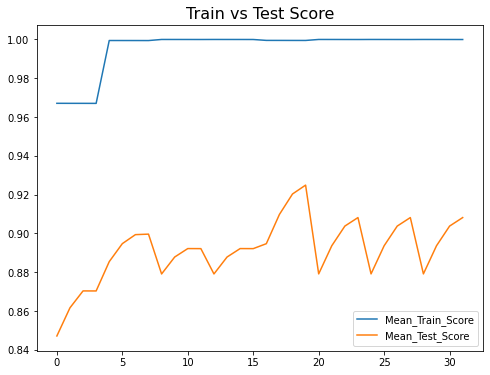

In [88]:
# plot train vs test scores
plt.figure(figsize=[8, 6])
plt.plot(cv_results.mean_train_score, label="Mean_Train_Score")
plt.plot(cv_results.mean_test_score, label="Mean_Test_Score")
plt.legend()
plt.title("Train vs Test Score", fontsize=16)
plt.show()

In [89]:
print("Best Params:", grid_model_dt.best_params_)
best_model_dt = grid_model_dt.best_estimator_
best_model_dt

Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       random_state=42)

TRAIN data Details: 
[[199015      5]
 [    50    294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.98      0.85      0.91       344

    accuracy                           1.00    199364
   macro avg       0.99      0.93      0.96    199364
weighted avg       1.00      1.00      1.00    199364

Accuracy: 1.0
Recall: 0.855
Precision: 0.983


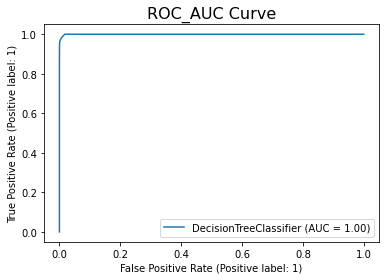


TEST data Details: 
[[85272    23]
 [   54    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.64      0.71       148

    accuracy                           1.00     85443
   macro avg       0.90      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.999
Recall: 0.635
Precision: 0.803


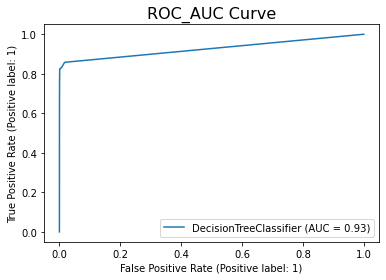

In [90]:
# evaluating Decision Tree
evaluation(best_model_dt)

Seeing the above results we can say that the Decision Tree has definitely Over fit the Data. Even though the Recall is high the ROC_AUC score is low compared to previous model.
<br>
So lets build another model on the same imbalanced dataset

### RandomForest Classifier

In [97]:
# # import libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

In [99]:
# # random forest model
# rf = RandomForestClassifier(oob_score=True, random_state=42)

# params = {
#     "criterion": ["gini", "entropy"],
#     'max_depth': [10, 20, 30, 35],
#     'min_samples_split': [10, 20, 30],
#     'n_estimators': [50, 100, 300, 400]
# }

# # random search
# random_model_rf = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=4,
#                             n_jobs=-1, verbose=2, scoring='roc_auc', return_train_score=True)

In [101]:
# # fit random model randomforest
# random_model_rf.fit(X_train, y_train)

### XGBoost Classifier

In [110]:
# import libraries
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [111]:
# XGB Model
xgb = XGBClassifier(tree_method='gpu_hist', random_state=42)

params = {
    'max_depth': [10, 20, 30, 35],
    'min_samples_split': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [50, 100, 300, 400, 500]
}

# # random search model
# random_model_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv=4, n_jobs=-1,
#                                       verbose=2, scoring='roc_auc', return_train_score=True)

# grid search model
grid_model_xgb = GridSearchCV(estimator=xgb, param_grid=params, cv=4, n_jobs=-1,
                             verbose=2, scoring='roc_auc', return_train_score=True)

In [112]:
# # fit random search model
# random_model_xgb.fit(X_train, y_train)

# fit grid search model
grid_model_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits
[22:06:38] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:06:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method='gpu_hist',
                                     validate_parameters=Non

In [114]:
# cross validation results
cv_results = pd.DataFrame(grid_model_xgb.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,2.328680,0.038821,0.163462,0.021982,0.01,10,10,50,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.935711,...,0.924033,0.931288,0.004816,175,0.929889,0.931835,0.929878,0.933803,0.931351,0.001624
1,2.573052,0.033096,0.137746,0.050213,0.01,10,10,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.935676,...,0.924043,0.931293,0.004806,169,0.929909,0.931848,0.929893,0.933807,0.931364,0.001619
2,7.141726,0.117023,0.244238,0.006677,0.01,10,10,300,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.935563,...,0.933043,0.941734,0.007857,163,0.937515,0.976661,0.955847,0.963338,0.958340,0.014147
3,9.774157,0.171034,0.304920,0.070344,0.01,10,10,400,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.967560,...,0.952664,0.957271,0.006263,160,0.966203,0.977116,0.963292,0.974353,0.970241,0.005674
4,12.683712,0.336067,0.427927,0.088590,0.01,10,10,500,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.974081,...,0.965554,0.968407,0.007965,145,0.991536,0.981730,0.981948,0.985984,0.985299,0.003979


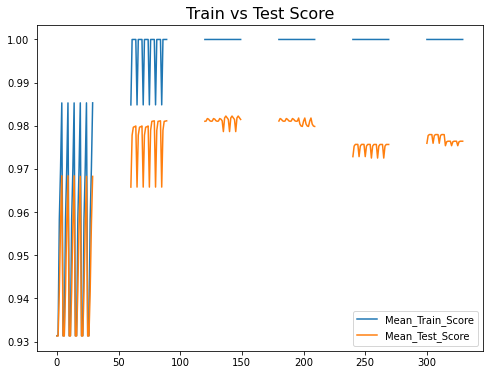

In [115]:
# plot train vs test scores
plt.figure(figsize=[8, 6])
plt.plot(cv_results.mean_train_score, label="Mean_Train_Score")
plt.plot(cv_results.mean_test_score, label="Mean_Test_Score")
plt.legend()
plt.title("Train vs Test Score", fontsize=16)
plt.show()

In [116]:
print("Best Params:", random_model_xgb.best_params_)
best_model_xgb = random_model_xgb.best_estimator_
best_model_xgb

Best Params: {'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 20, 'learning_rate': 0.5}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=20, min_child_weight=1, min_samples_split=10,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

TRAIN data Details: 
[[199020      0]
 [     0    344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


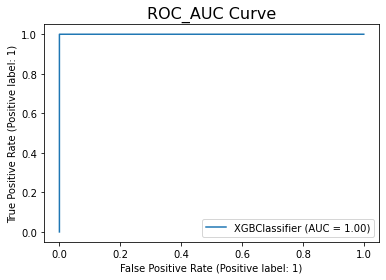


TEST data Details: 
[[85289     6]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 1.0
Recall: 0.764
Precision: 0.95


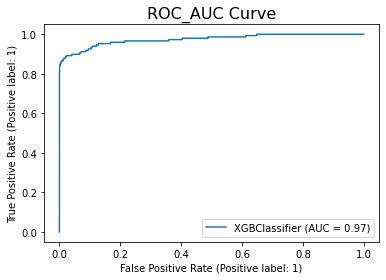

In [117]:
# evaluating Random Forest
evaluation(best_model_xgb)

From all the above models XGBClassifier has given the better results overl all, as it has given us better Recall and Precision also. So, we'll proceed with this model in this imbalanced segment.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [122]:
clf = best_model_xgb  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

print()
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", np.round(accuracy_score(y_test, y_test_pred), 3)) #print the evaluation score on the X_test by choosing the best evaluation metric
print("Test Recall:", np.round(recall_score(y_test, y_test_pred), 3))
print("Test Precision:", np.round(precision_score(y_test, y_test_pred), 3))
print("Test F1_Score:", np.round(f1_score(y_test, y_test_pred), 3))

[22:30:27] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:30:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Test Accuracy: 1.0
Test Recall: 0.764
Test Precision: 0.95
Test F1_Score: 0.846


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 10
2nd Top var = 14
3rd Top var = 7


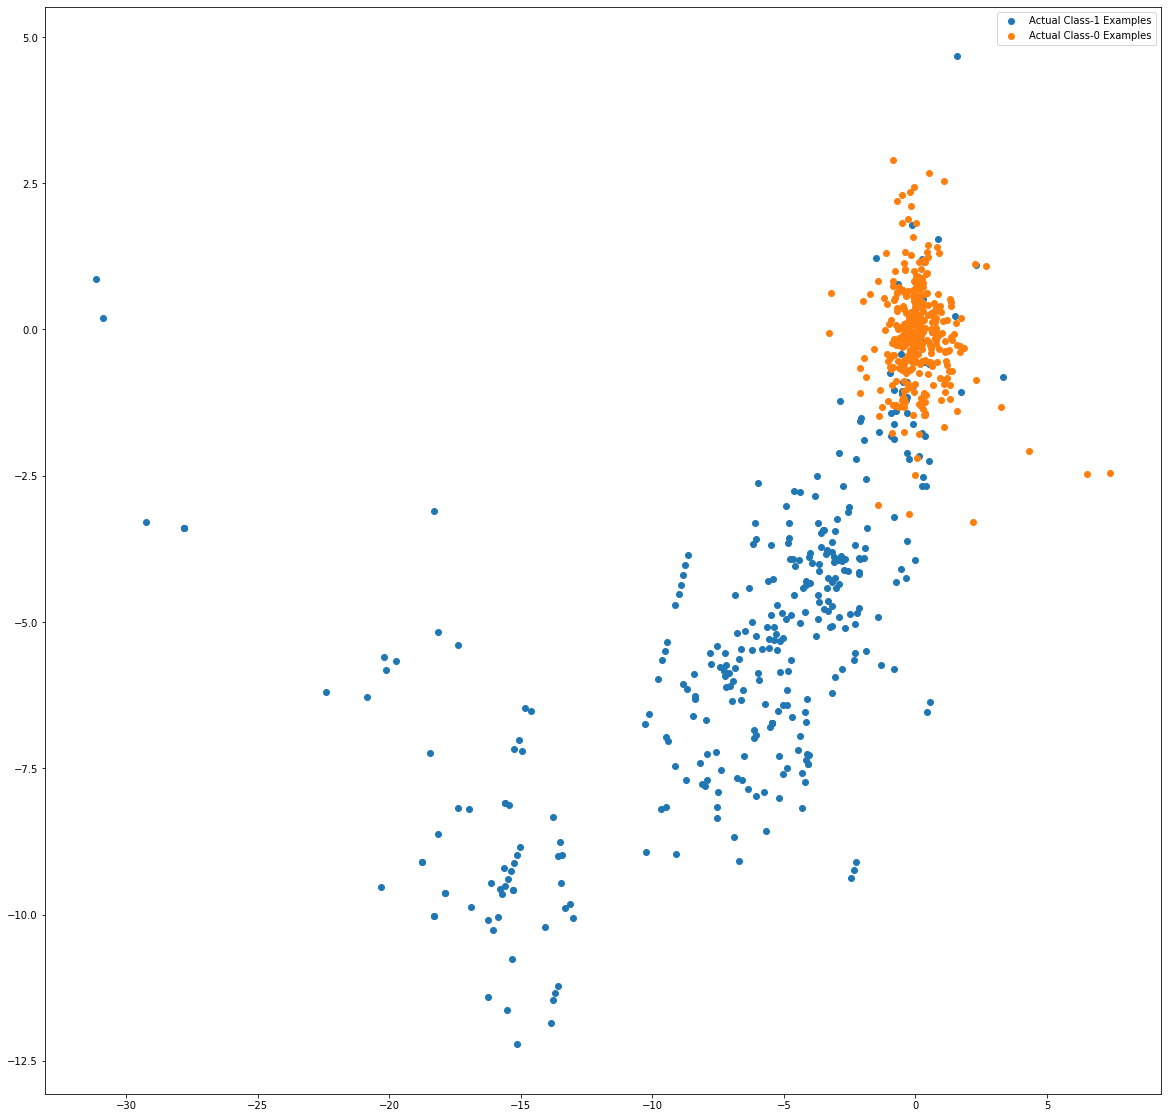

In [124]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)